In [1]:
#Author: Mark Warren
#Date: 28/01/2024
#Purpose: To analyse Groceries in Tescos (UK) data

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../input/tesco-uk-groceries-dataset/tesco_groceries_dataset.csv')

# Data Understanding

In [3]:
df.shape

(333, 22)

In [4]:
df.head(5)

,name,url,sku,gtin13,price,currency,availability,description,brand,breadcrumbs,...,reviews_count,pack_size,ingredients,storage_details,product_origin,percentage_alcohol,serving_size,nutrition,uniq_id,scraped_at
0,Birds Eye Crispy Pancakes Beef & Onion 4 Pack ...,https://www.tesco.com/groceries/en-GB/products...,305829059,5000116125234,2.20,GBP,OutOfStock,Pancakes coated in breadcrumbs with a minced b...,BIRDS EYE,Frozen Food~Frozen Ready Meals~Frozen Snacking,...,23.0,Pack size: 266G,"Filling (42%) (Water, Minced Beef (20%), Fried...",Store in a freezer at -18°C or cooler.,NaN,NaN,This pack contains 4 portions,"[{'Energy - kJ': '1145kJ'}, {' - kcal': '274kc...",9295ea70-cba4-520f-af19-e16b23066921,12/19/22
1,Unicorn & Dino Storybooks 4 Pack,https://www.tesco.com/groceries/en-GB/products...,311932942,9781803683058,1.50,GBP,InStock,UNICORN & DINO STORYBOOKS 4PK,IGLOO,Home & Ents~Party & Giftwrap~Party Bags & Loot...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],7c283545-26d5-55ee-878e-bf520fd90b58,12/19/22
2,Schwartz Fish Seasoning 55G,https://www.tesco.com/groceries/en-GB/products...,257522449,50020881,1.85,GBP,InStock,Schwartz Fish Seasoning 55G. For recipes and c...,SCHWARTZ,"Food Cupboard~Cooking Ingredients~Seasoning, H...",...,5.0,Pack size: 55G,"Dried Onion, Sea Salt, Sugar, Maltodextrin, Fl...","Store in a cool, dry place out of direct sunli...",Produced in the EU,NaN,NaN,"[{'Energy': '1067kJ/253kcal'}, {'Fat - Total':...",fb250b33-8b77-593b-95a2-e51bde919be7,12/19/22
3,Hearty Food Co Mac 'N' Cheese 400G,https://www.tesco.com/groceries/en-GB/products...,299555755,5057545678336,0.75,GBP,InStock,Cheese sauce with cooked macaroni pasta topped...,HEARTY FOOD CO.,Frozen Food~Frozen Ready Meals~Frozen Italian ...,...,57.0,Pack size: 400G,NaN,Keep Frozen at -18°C or cooler. Important:I...,NaN,NaN,1 Servings,"[{'Energy': '511kJ / 121kcal'}, {'Fat': '2.7g'...",7b233e41-e3c8-5ec1-81c3-5311cdb07392,12/19/22
4,Tesco Dijon Mustard 185G,https://www.tesco.com/groceries/en-GB/products...,260691710,5051140474201,0.65,GBP,InStock,Dijon mustard.,TESCO,"Food Cupboard~Table Sauces, Olives, Pickles & ...",...,30.0,Pack size: 185G,NaN,"Store in a cool, dry place. Once opened, keep ...",Made using Non-EU mustard seeds.,NaN,37 Servings,"[{'Energy': '530kJ / 128kcal'}, {'Fat': '9.2g'...",df982b9a-98dc-5037-9a68-609722d73456,12/19/22


In [5]:
df.columns

Index(['name', 'url', 'sku', 'gtin13', 'price', 'currency', 'availability',
       'description', 'brand', 'breadcrumbs', 'images', 'avg_rating',
       'reviews_count', 'pack_size', 'ingredients', 'storage_details',
       'product_origin', 'percentage_alcohol', 'serving_size', 'nutrition',
       'uniq_id', 'scraped_at'],
      dtype='object')

In [6]:
df.dtypes

name                   object
url                    object
sku                     int64
gtin13                  int64
price                 float64
currency               object
availability           object
description            object
brand                  object
breadcrumbs            object
images                 object
avg_rating            float64
reviews_count         float64
pack_size              object
ingredients            object
storage_details        object
product_origin         object
percentage_alcohol     object
serving_size           object
nutrition              object
uniq_id                object
scraped_at             object
dtype: object

In [7]:
df.describe()

,sku,gtin13,price,avg_rating,reviews_count
count,3.330000e+02,3.330000e+02,333.000000,264.000000,264.000000
mean,2.950478e+08,4.958524e+12,5.185646,4.009848,194.984848
std,1.888694e+07,1.989713e+12,7.349059,0.962163,1152.646850
min,2.507595e+08,3.011119e+06,0.310000,1.000000,1.000000
25%,2.815726e+08,5.010041e+12,1.600000,3.500000,3.000000
50%,3.036769e+08,5.053947e+12,3.000000,4.300000,10.000000
75%,3.097649e+08,5.060088e+12,6.000000,4.700000,34.000000
max,3.130107e+08,9.781804e+12,72.250000,5.000000,10720.000000


# Data Preparation

In [8]:
df.head()

,name,url,sku,gtin13,price,currency,availability,description,brand,breadcrumbs,...,reviews_count,pack_size,ingredients,storage_details,product_origin,percentage_alcohol,serving_size,nutrition,uniq_id,scraped_at
0,Birds Eye Crispy Pancakes Beef & Onion 4 Pack ...,https://www.tesco.com/groceries/en-GB/products...,305829059,5000116125234,2.20,GBP,OutOfStock,Pancakes coated in breadcrumbs with a minced b...,BIRDS EYE,Frozen Food~Frozen Ready Meals~Frozen Snacking,...,23.0,Pack size: 266G,"Filling (42%) (Water, Minced Beef (20%), Fried...",Store in a freezer at -18°C or cooler.,NaN,NaN,This pack contains 4 portions,"[{'Energy - kJ': '1145kJ'}, {' - kcal': '274kc...",9295ea70-cba4-520f-af19-e16b23066921,12/19/22
1,Unicorn & Dino Storybooks 4 Pack,https://www.tesco.com/groceries/en-GB/products...,311932942,9781803683058,1.50,GBP,InStock,UNICORN & DINO STORYBOOKS 4PK,IGLOO,Home & Ents~Party & Giftwrap~Party Bags & Loot...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],7c283545-26d5-55ee-878e-bf520fd90b58,12/19/22
2,Schwartz Fish Seasoning 55G,https://www.tesco.com/groceries/en-GB/products...,257522449,50020881,1.85,GBP,InStock,Schwartz Fish Seasoning 55G. For recipes and c...,SCHWARTZ,"Food Cupboard~Cooking Ingredients~Seasoning, H...",...,5.0,Pack size: 55G,"Dried Onion, Sea Salt, Sugar, Maltodextrin, Fl...","Store in a cool, dry place out of direct sunli...",Produced in the EU,NaN,NaN,"[{'Energy': '1067kJ/253kcal'}, {'Fat - Total':...",fb250b33-8b77-593b-95a2-e51bde919be7,12/19/22
3,Hearty Food Co Mac 'N' Cheese 400G,https://www.tesco.com/groceries/en-GB/products...,299555755,5057545678336,0.75,GBP,InStock,Cheese sauce with cooked macaroni pasta topped...,HEARTY FOOD CO.,Frozen Food~Frozen Ready Meals~Frozen Italian ...,...,57.0,Pack size: 400G,NaN,Keep Frozen at -18°C or cooler. Important:I...,NaN,NaN,1 Servings,"[{'Energy': '511kJ / 121kcal'}, {'Fat': '2.7g'...",7b233e41-e3c8-5ec1-81c3-5311cdb07392,12/19/22
4,Tesco Dijon Mustard 185G,https://www.tesco.com/groceries/en-GB/products...,260691710,5051140474201,0.65,GBP,InStock,Dijon mustard.,TESCO,"Food Cupboard~Table Sauces, Olives, Pickles & ...",...,30.0,Pack size: 185G,NaN,"Store in a cool, dry place. Once opened, keep ...",Made using Non-EU mustard seeds.,NaN,37 Servings,"[{'Energy': '530kJ / 128kcal'}, {'Fat': '9.2g'...",df982b9a-98dc-5037-9a68-609722d73456,12/19/22


In [9]:
df.columns

Index(['name', 'url', 'sku', 'gtin13', 'price', 'currency', 'availability',
       'description', 'brand', 'breadcrumbs', 'images', 'avg_rating',
       'reviews_count', 'pack_size', 'ingredients', 'storage_details',
       'product_origin', 'percentage_alcohol', 'serving_size', 'nutrition',
       'uniq_id', 'scraped_at'],
      dtype='object')

In [10]:
df = df[['name',
    'description', 
    'breadcrumbs',
    'availability',
    'price', 
    'brand',
    'avg_rating',
    'reviews_count'
    ]].copy() 
    
    #'url', 'sku', 'gtin13', 
    #'currency', 
    #'images', 
    #'pack_size', 'ingredients', 'storage_details',
    #'product_origin', 'percentage_alcohol', 'serving_size', 'nutrition',
    #'uniq_id', 'scraped_at'

In [11]:
df.shape

(333, 8)

In [12]:
df.dtypes

name              object
description       object
breadcrumbs       object
availability      object
price            float64
brand             object
avg_rating       float64
reviews_count    float64
dtype: object

In [13]:
df.columns

Index(['name', 'description', 'breadcrumbs', 'availability', 'price', 'brand',
       'avg_rating', 'reviews_count'],
      dtype='object')

In [14]:
df = df.rename(columns={'name':'Name',
                    'description':'Description', 
                    'breadcrumbs':'Type',
                    'availability':'Status',
                    'price':'Price', 
                    'brand':'Brand',
                    'avg_rating':'Average_Rating',
                    'reviews_count':'Number_Of_Reviews'})

In [15]:
df.isna().sum()

Name                  0
Description           0
Type                  0
Status                0
Price                 0
Brand                 0
Average_Rating       69
Number_Of_Reviews    69
dtype: int64

In [16]:
df.loc[df.duplicated()]

,Name,Description,Type,Status,Price,Brand,Average_Rating,Number_Of_Reviews


In [17]:
df.duplicated(subset=['Name']).sum()

0

# Feature Understanding

In [18]:
df.head()

,Name,Description,Type,Status,Price,Brand,Average_Rating,Number_Of_Reviews
0,Birds Eye Crispy Pancakes Beef & Onion 4 Pack ...,Pancakes coated in breadcrumbs with a minced b...,Frozen Food~Frozen Ready Meals~Frozen Snacking,OutOfStock,2.20,BIRDS EYE,1.5,23.0
1,Unicorn & Dino Storybooks 4 Pack,UNICORN & DINO STORYBOOKS 4PK,Home & Ents~Party & Giftwrap~Party Bags & Loot...,InStock,1.50,IGLOO,NaN,NaN
2,Schwartz Fish Seasoning 55G,Schwartz Fish Seasoning 55G. For recipes and c...,"Food Cupboard~Cooking Ingredients~Seasoning, H...",InStock,1.85,SCHWARTZ,5.0,5.0
3,Hearty Food Co Mac 'N' Cheese 400G,Cheese sauce with cooked macaroni pasta topped...,Frozen Food~Frozen Ready Meals~Frozen Italian ...,InStock,0.75,HEARTY FOOD CO.,3.3,57.0
4,Tesco Dijon Mustard 185G,Dijon mustard.,"Food Cupboard~Table Sauces, Olives, Pickles & ...",InStock,0.65,TESCO,3.5,30.0


In [19]:
df['Price'].value_counts() \
    .head(10)

Price
3.00     19
1.50     14
6.00     13
2.50     13
2.00     13
1.00     13
10.00    10
5.00      9
3.50      9
1.75      7
Name: count, dtype: int64

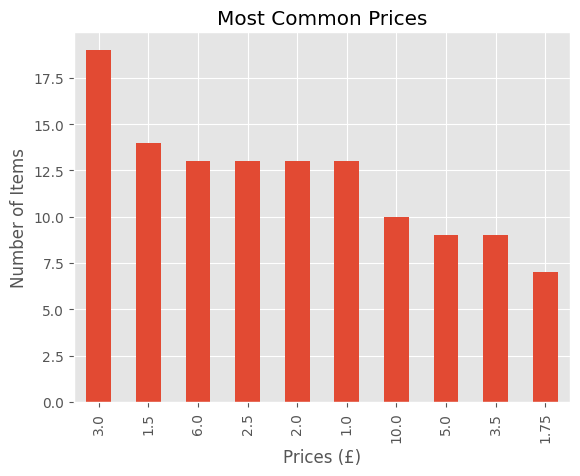

In [20]:
ax1 = df['Price'].value_counts() \
    .head(10) \
    .plot(kind='bar', title ='Most Common Prices')
ax1.set_xlabel('Prices (£)')
ax1.set_ylabel('Number of Items')
plt.show()

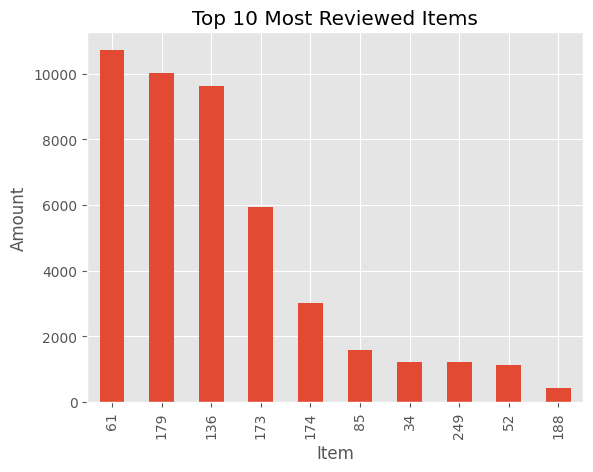

In [21]:
ax2 = df['Number_Of_Reviews'].sort_values(ascending=False) \
    .head(10) \
    .plot(kind='bar',title='Top 10 Most Reviewed Items')

ax2.set_xlabel('Item')
ax2.set_ylabel('Amount')
plt.show()

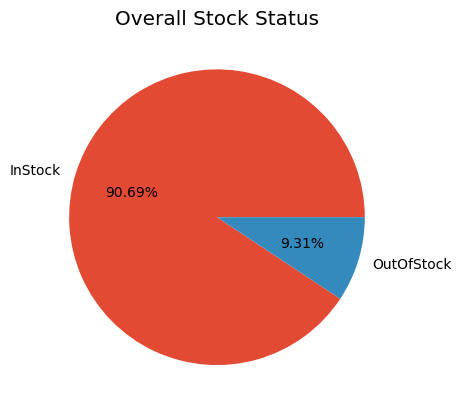

In [22]:
ax3 = df['Status'].value_counts()
ax3 = plt.pie(ax3,labels=ax3.index, autopct='%2.2f%%')
plt.title(label='Overall Stock Status')
plt.show()

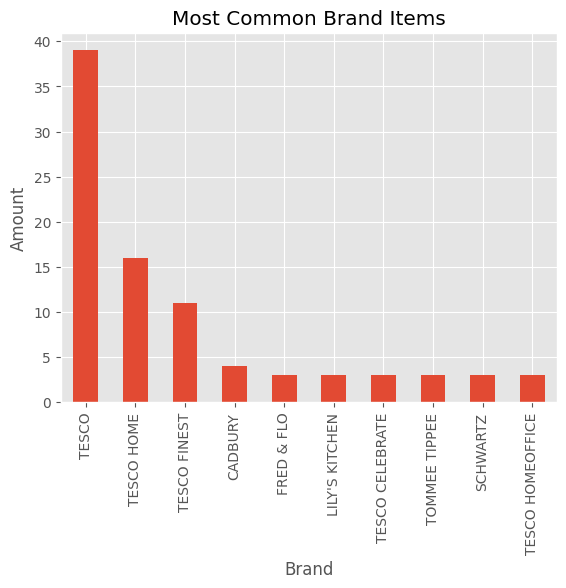

In [23]:
ax4= df['Brand'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Most Common Brand Items')
ax4.set_ylabel('Amount')
plt.show()

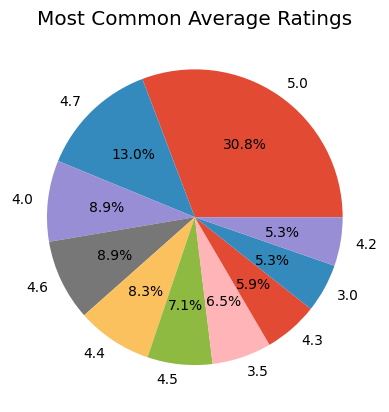

In [24]:
ax5 = df['Average_Rating'].value_counts() \
    .head(10)
ax5 = plt.pie(ax5,labels=ax5.index,autopct='%2.1f%%')
plt.title(label='Most Common Average Ratings')
plt.show()

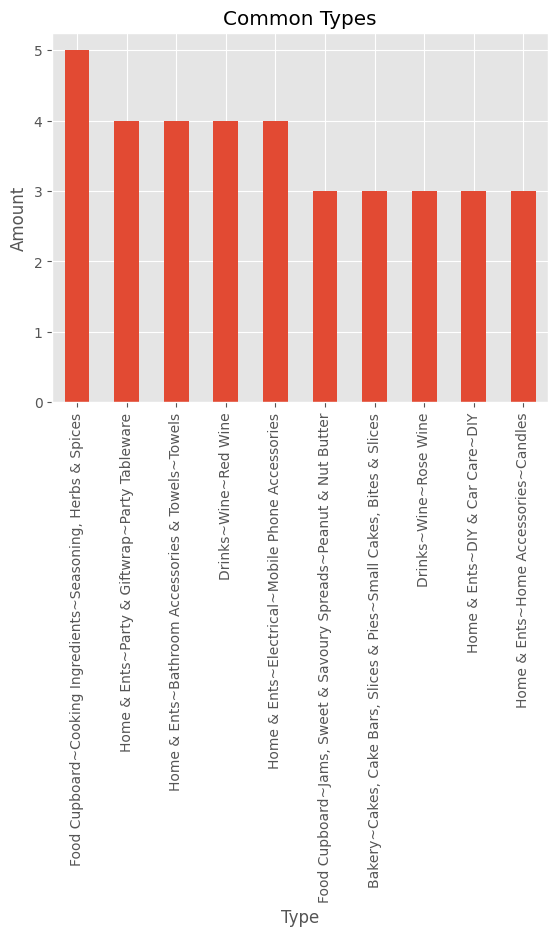

In [25]:
ax6= df['Type'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Common Types')
ax6.set_ylabel('Amount')
plt.show()

# Feature Relationships

In [26]:
df.columns

Index(['Name', 'Description', 'Type', 'Status', 'Price', 'Brand',
       'Average_Rating', 'Number_Of_Reviews'],
      dtype='object')

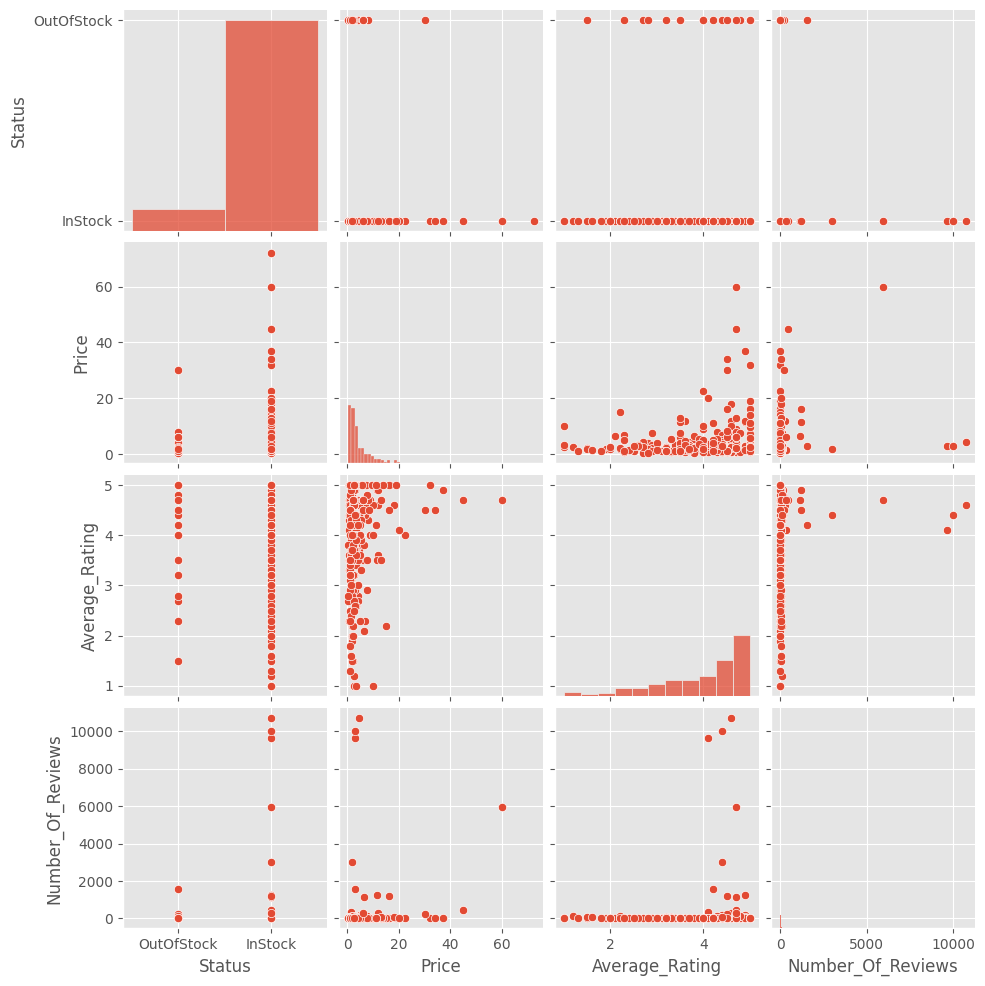

In [27]:
sns.pairplot(df, vars=['Status', 'Price',
       'Average_Rating', 'Number_Of_Reviews'])
plt.show()

In [28]:
df_corr = df[['Price','Average_Rating', 'Number_Of_Reviews']].dropna().corr()
df_corr

,Price,Average_Rating,Number_Of_Reviews
Price,1.000000,0.183048,0.161182
Average_Rating,0.183048,1.000000,0.067038
Number_Of_Reviews,0.161182,0.067038,1.000000


<Axes: >

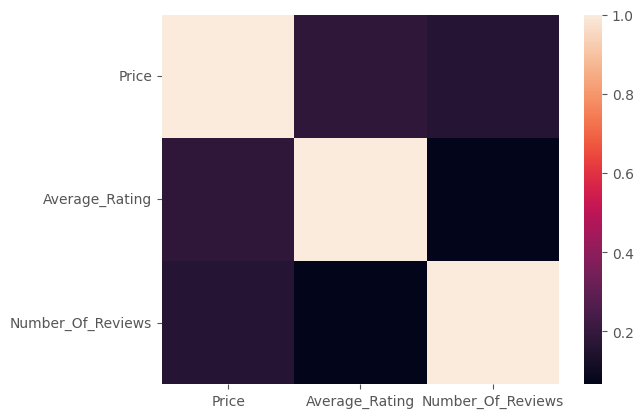

In [29]:
sns.heatmap(df_corr)

# What Brands are the best rated?

<Axes: title={'center': 'Top Brands by Rating'}, ylabel='Brand'>

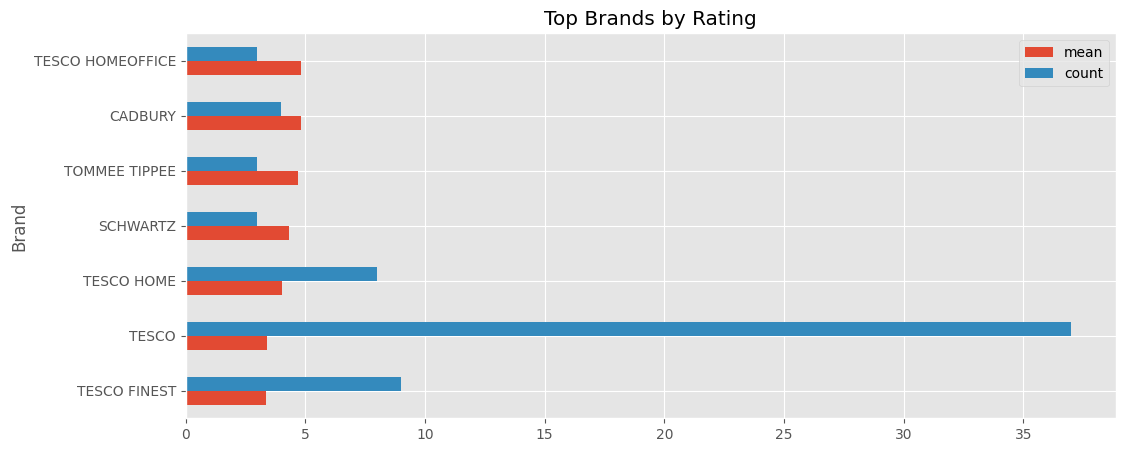

In [30]:
df.groupby('Brand')['Average_Rating'] \
    .agg(['mean','count']) \
    .query('count >= 3') \
    .sort_values('mean') \
    .plot(kind='barh', figsize=(12,5), title='Top Brands by Rating')